# Introduction to reproducibility and power issues

### Acknowledgements: 

This notebook borrows significantly from works by :

    * Matthew Brett
    * Tal Yarkoni
    
and from a previous presentation at the Despo lab. 


## Outline

1. Significance, evidence and causes of non reproducibility
2. Power issues: definition
3. A quick questionnaire
4. Button et al., 2013
5. Friston et al., 2012, and Yarkoni's answers

In [3]:
from IPython.display import Image as Image


Johnson, V.E. (2013). Revised standards for statistical evidence. PNAS 110, 19313–19317.


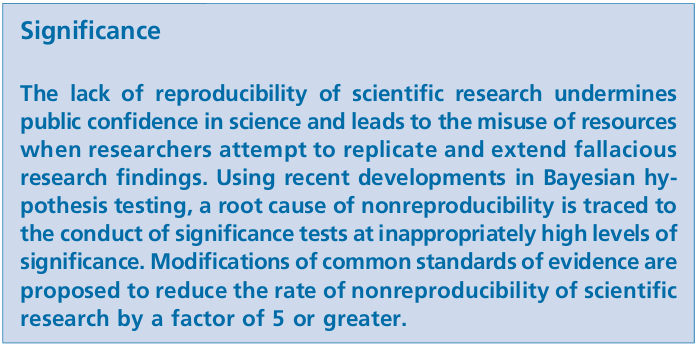

In [4]:
print "Johnson, V.E. (2013). Revised standards for statistical evidence. PNAS 110, 19313–19317."
Image('./figures/johnson_PNAS_2013_significance.png')




The correspondence between P values and Bayes factors based on         
 UMPBTs suggest that commonly used thresholds for statistical         
 significance represent only moderate evidence against null         
 hypotheses. 



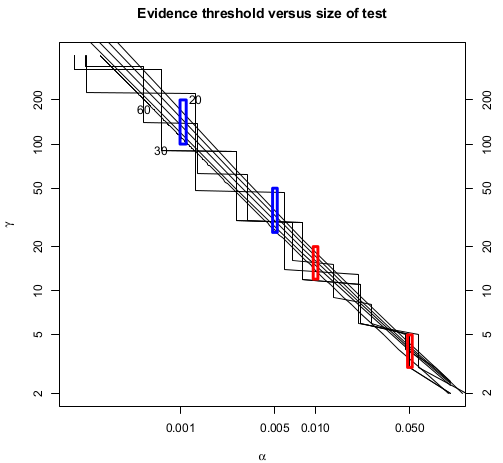

In [5]:
print "\nThe correspondence between P values and Bayes factors based on \
        \n UMPBTs suggest that commonly used thresholds for statistical \
        \n significance represent only moderate evidence against null \
        \n hypotheses. \n"

Image('./figures/johnson_PNAS_2013_pval_bayefct.png')


## Evidence and causes of non reproducibility

* In general 
    - Nature "Reducing our irreproducibility", 2013
* In pre-oncology 
    - Begley and Ellis, 2011
* In psychological science
    - Reproducibility Project: Psychology osf.io/ezcuj/wiki/home/
    - some response to this (J. Mitchell, Harvard)
* In Genetics
    - GWAS (Ioannidis 2007)
    - Stein et al., 2012
* In neuroimaging
    - Raemaekers 2007, Thirion 2007, Carp 2013, etc
* In Imaging Genetics
    - Molendijk 2012, Meir 2008 

from Molendijk 2012


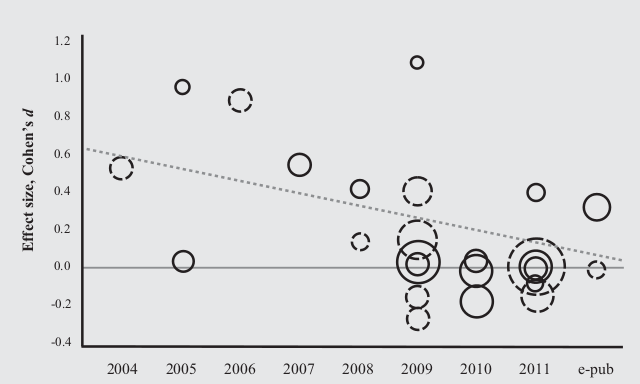

In [6]:
print "from Molendijk 2012"
Image('./figures/molendijk_2012_f4.png')

* __Analyses are getting complex__
    * Data acquisition  
    * Linking with other data
    * Data size 
    * Methods


* __Publication pressure is high__
    * I don't think I need to argue this here : Benefice / Risk in favor of quick publications


* __Mistakes are done__
    * "The scientific method’s central motivation is the ubiquity of error — the awareness that mistakes and self-delusion can creep in absolutely anywhere and that the scientist’s effort is primarily expended in recognizing and rooting out error." _Donoho, 2009._
    
    * Anatomy of an error


* __Power issues__


## Causes of non reproducibility: Ioannidis 2005, Plos One

### Corollary 1: The smaller the studies conducted in a scientific field, the less likely the research findings are to be true.

### Corollary 2: The smaller the effect sizes in a scientific field, the less likely the research findings are to be true.

### Corollary 3: The greater the number and the lesser the selection of tested relationships in a scientific field, the less likely the research findings are to be true. 

### Corollary 4: The greater the flexibility in designs, definitions, outcomes, and analytical modes in a scientific field, the less likely the research findings are to be true.

See: 
Simmons, J.P., Nelson, L.D., and Simonsohn, U. (2011). False-Positive Psychology: Undisclosed Flexibility in Data Collection and Analysis Allows Presenting Anything as Significant. Psychological Science 22, 1359–1366.

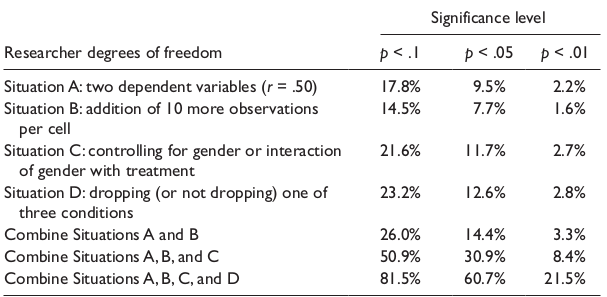

In [7]:
Image('./figures/simons_table.png')

### Corollary 5: The greater the financial and other interests and prejudices in a scientific field, the less likely the research findings are to be true

### Corollary 6: The hotter a scientific field (with more scientific teams involved), the less likely the research findings are to be true.

## Some Definitions 

* $H_0$ : null hypothesis: The effect we are testing for is null

* $H_A$ : alternative hypothesis : Not $H_0$

* $T_S$ : Test is significant (eg $T = T_S$)

* $T_N$ : Test is not significant (eg $T = T_N$)

* $\alpha$ : false positive rate - probability to reject $H_0$ when $H_0$ is true (therefore $H_A$ is false)

* $\beta$ : false negative rate - probability to accept $H_0$ when $H_A$ is true ($H_0$ is false)


power = $1-\beta$ 

where $\beta$ is the risk of *false negative*

So, to compute power, *we need to know what is the risk of false negative*, ie, the risk to not show a significant effect while we have some signal (null is false).

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [9]:
from sympy import symbols, Eq, solve, simplify, lambdify, init_printing, latex
init_printing(use_latex=True, order='old')

In [10]:
from IPython.display import HTML
# Code to make HTML for a probability table
def association_table(assocs, title):
    latexed = {'title': title}
    for key, value in assocs.items():
        latexed[key] = latex(value)
    latexed['s_total'] = latex(assocs['t_s'] + assocs['f_s'])
    latexed['ns_total'] = latex(assocs['t_ns'] + assocs['f_ns'])
    return """<h3>{title}</h3>
              <TABLE><TR><TH>$H/T$<TH>$T_S$<TH>$T_N$
              <TR><TH>$H_A$<TD>${t_s}$<TD>${t_ns}$
              <TR><TH>$H_0$<TD>${f_s}$<TD>${f_ns}$
              <TR><TH>Total<TD>${s_total}$<TD>${ns_total}$
              </TABLE>""".format(**latexed)

In [11]:
from sympy.abc import alpha, beta # get alpha, beta symbolic variables
assoc = dict(t_s = 1 - beta, # H_A true, test significant = true positives
             t_ns = beta, # true, not significant = false negatives
             f_s = alpha, # false, significant = false positives
             f_ns = 1 - alpha) # false, not sigificant = true negatives
HTML(association_table(assoc, 'Not considering prior'))

## How do we compute power ? 

### What is the effect ?


$$\hspace{3cm}\mu = \mu_1 - \mu_2$$

### What is the standardized effect ? (eg Cohen's d)

$$\hspace{3cm}d = \frac{\mu_1 - \mu_2}{\sigma} = \frac{\mu}{\sigma}$$

### "Z" : Effect accounting for the sample size 

$$\hspace{3cm}Z = \frac{\mu}{\sigma / \sqrt{n}}$$

### Cohen's d value:

In [12]:
# print some cohen values
# %pylab inline
muse = (.05, .1,.2,.3,.4,.5);
sigmas = np.linspace(1.,.5,len(muse))
cohenstr = ["For sigma = %3.2f and m = %3.2f Cohen d = %3.2f" %(sig,mu,coh) 
       for (sig,mu,coh) in zip(sigmas,muse, np.asarray(muse)/sigmas)]
for s in cohenstr:
    print s

For sigma = 1.00 and m = 0.05 Cohen d = 0.05
For sigma = 0.90 and m = 0.10 Cohen d = 0.11
For sigma = 0.80 and m = 0.20 Cohen d = 0.25
For sigma = 0.70 and m = 0.30 Cohen d = 0.43
For sigma = 0.60 and m = 0.40 Cohen d = 0.67
For sigma = 0.50 and m = 0.50 Cohen d = 1.00


We have to estimate the effect $\mu$, say under some normal noise. Our statistic will be:

$$
t = \frac{\hat{\mu}}{\hat{\sigma_{\mu}}} = \frac{\hat{\mu}}{\hat{{SE}_{\mu}}}
$$

Power is the probability that the observed t is greater than $t_{.05}$, computing $t_{.05}$ by assuming that we are under the null. 

So, we compute $t_{.05}$, and want to compute $P(t > t_{.05})$. 

To compute this, __we need the distribution of our measured t - therefore we need to know the signal / effect size !__ 

Let's assume we know this and call it $t_{nc}$, and $F_{nc}$ for the cumulative distribution (more on this in the appendix).

$\mbox{Power} = 1 - \beta =  P(t > t_{.05}) = 1 - F_{nc}(t_{.05})$


__This power will depend on 4 parameters :__

$$ \mbox{The non standardized effect : } \mu$$

$$\mbox{The standard deviation of the data : } \sigma$$

$$\mbox{The number of subjects : } n$$

$$\mbox{The type I risk of error : } \alpha$$

And on the distribution of the statistic under the alternative hypothesis. Here, we assume our original data are normals, and the $t = \frac{\hat{\mu}}{\hat{{SE}_{\mu}}}$ statistics follows a non central t distribution with non centrality parameter 

$$\theta = \mu \sqrt{n}/\sigma$$

and $n-1$ degrees of freedom. 

In [13]:
import scipy.stats as sst
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

In [14]:
# plot power as a function of n : define a little function that 
# takes n, mu, sigma, alpha, and report n. Optionally plot power as a function of n
from matplotlib.patches import Polygon

def stat_power(n=16, mu=1., sigma=1., plot=False, alpha=0.05, xlen=500):
    """
    n: number of samples
    mu: non standardized effect
    sigma: standard deviation of the data
    """
    
    df = n-1
    theta = sqrt(n)*mu/sigma
    t_alph_null = sst.t.isf(alpha, df)
    ncrv = sst.nct(df, theta)
    spow = 1 - ncrv.cdf(t_alph_null)
    
    if plot:
        # define the domain of the plot
        norv = sst.norm(0, 1.)
        bornesnc = ncrv.isf([0.001, .999])
        bornesn = norv.isf([0.001, .999])
        # because the nc t will have higher max borne, and the H0 normal will be on the left
        x = np.linspace(np.min(bornesn), np.max(bornesnc), xlen)
        t_line = np.zeros_like(x)
        # define the line 
        x_t_line = argmin((x-t_alph_null)**2)
        y_t_line = np.max(np.hstack((ncrv.pdf(x), norv.pdf(x))))
        t_line[x_t_line] = y_t_line

        fig, ax = plt.subplots()
        plt.plot(x, ncrv.pdf(x), 'g', x, norv.pdf(x), 'b', x, t_line, 'r')
        
        # Make the shaded region
        # http://matplotlib.org/xkcd/examples/showcase/integral_demo.html
        a = x[x_t_line]; b =  np.max(bornesnc);
        ix = np.linspace(a,b)
        iy = ncrv.pdf(ix)
        verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
        poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
        ax.add_patch(poly)
        
        ax.set_xlabel("t-value - H1 centred on " + r"$\theta $" + " = %4.2f;  " %theta 
                      + r"$\mu$" + " = %4.2f" %mu); 
        ax.set_ylabel("Probability(t)");
        ax.set_title('H0 and H1 sampling densities ' 
                     + r'$\beta$' + '= %3.2f' %spow + ' n = %d' %n)
        plt.show()

    return spow


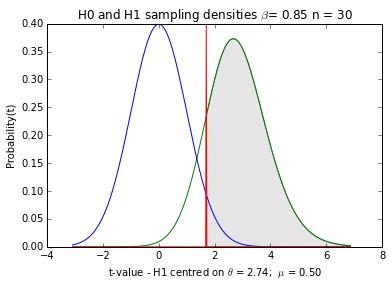

Power =  0.848254177209       Z effect (Non centrality parameter):  2.73861278753


In [15]:
n = 30
mu = .5
sigma = 1.
pwr = stat_power(n, mu, sigma, plot=True, alpha=0.05, xlen=500)
print "Power = ", pwr, "      Z effect (Non centrality parameter): ", mu*sqrt(n)/sigma

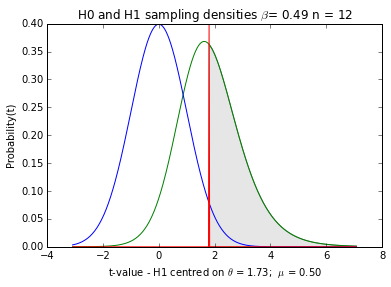

Power =  0.491884484399       Z effect (Non centrality parameter):  1.73205080757


In [16]:
n = 12
mu = .5
sigma = 1.
pwr = stat_power(n, mu, sigma, plot=True, alpha=0.05, xlen=500)
print "Power = ", pwr, "      Z effect (Non centrality parameter): ", mu*sqrt(n)/sigma

### Plot power as a function of the number of subject in the study

/home/jb/.virtualenvs/py2/local/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The "loc" positional argument to legend is deprecated. Please use the "loc" keyword instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


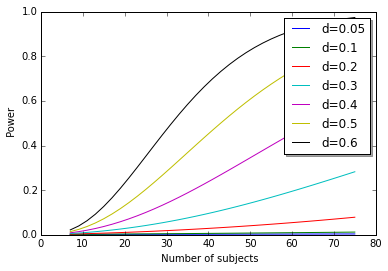

In [17]:
def pwr_funcofsubj(muse, nses, alpha=.05, sigma=1):
    """
    muse: array of mu
    nses: array of number of subjects
    alpha: float, type I risk
    sigma: float, data sigma
    """
    mstr = [ 'd='+str(m) for m in np.asarray(muse)/sigma]
    lines=[]
    for mu in (muse):
        pw = [stat_power(n, mu, sigma, alpha=alpha, plot=False) for n in nses]    
        (pl,) = plt.plot(nses, pw)
        lines.append(pl)
    plt.legend( lines, mstr, 'upper right', shadow=True)
    plt.xlabel(" Number of subjects ")
    plt.ylabel(" Power ");
    
    return None

mus = (.05, .1,.2,.3,.4,.5, .6);
#nse = range(70, 770, 20)
nse = range(7, 77, 2)
alph = 1.e-3
    
pwr_funcofsubj(mus, nse, alph)

### **** Here - play with n ****

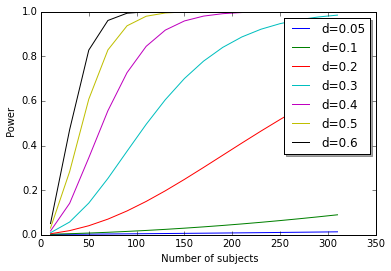

In [18]:
mus = (.05,.1,.2,.3,.4,.5,.6);
nse = range(10, 330, 20)
#nse = range(7, 77, 2)
alph = 0.001
    
pwr_funcofsubj(mus, nse, alph)

### Here - play with $\alpha$

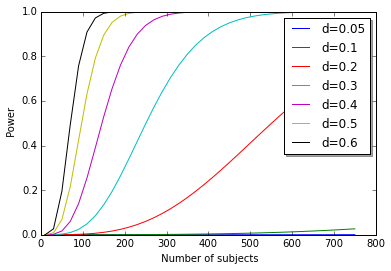

In [19]:
mus = (.05, .1,.2,.3,.4,.5, .6);
nse = range(10, 770, 20)
#nse = range(7, 77, 2)
alph = 0.05/30000
    
pwr_funcofsubj(mus, nse, alph)

### What is the effect size of APOE on the hippocampal volume ?

Authors find p value of 6.63e-10

They had 733 subjects



In [20]:
n01 = sst.norm(0,1.)
z = n01.isf(6.6311e-10)
d = n01.isf(6.6311e-10)/math.sqrt(733)
print "z = %4.3f d = %4.3f " %(z,d)

z = 6.064 d = 0.224 


## The questionnaire of Westover 2011 for medical students

Consider a typical medical research study, for example designed to test the efficacy of a drug, in which a null hypothesis H0 (’no effect’) is tested against an alternative hypothesis H 1 (’some effect’). Suppose that the study results pass a test of statistical significance (that is P-value<0.05) in favor of H1. What has been shown?


Westover, M.B., Westover, K., and Bianchi, M. (2011). Significance testing as perverse probabilistic reasoning. BMC Medicine 9, 20.


1. H0 is false.
2. H1 is true.
3. H0 is probably false.
4. H1 is probably true.
5. Both (1) and (2).
6. Both (3) and (4).
7. None of the above.

## Derivation of Ionannidis / Button positive prediction value : PPV

### Recall : Marginalize and Baye theorem

$\newcommand{Frac}[2]{\frac{\displaystyle #1}{\displaystyle #2}}$

Some new terms:

* $Pr(H_A)$ - prior probability of $H_A$ - probability of $H_A$ before the experiment was conducted.
* $Pr(H_0)$ - prior probability of $H_0$ = $1 - Pr(H_A)$ - probability of null hypothesis before experiment conducted

We are interested in updating the probability of $H_A$ and $H_0$ as a result of a test on some collected data.  This updated probability is $Pr(H_A | T)$ - the probability of $H_A$ given the test  result $T$. $Pr(H_A | T)$ is called the *posterior* probability because it is the probability after the test result.

Remembering that 

$$P(A) = \sum_{b_i} P(A,B=b_i) $$

To simplify the notation, we note $P(B=b)$ as $P(b)$

Remembering [Bayes theorem](http://en.wikipedia.org/wiki/Bayes'_theorem#Derivation):

$$P(A, B) = P(A | B) P(B)$$

and therefore

$$P(A | B) = \Frac{P(B, A)}{P(B)} = \Frac{P(B | A) P(A)}{P(B)}$$


Putting these two together we have : 


$$P(A) = \sum_{b_i} P(A|B=b_i) P(B=b_i)$$

Now, apply this to the probability of the test results $T$. The test takes a value either under  $H_A$ or $H_0$.
The probability of a *signficant* result of the test $T=T_S$ is :

$Pr(T=T_S) = P(T_S) = Pr(T_S | H_A) Pr(H_A) + Pr(T_S | H_0) Pr(H_0)$


What is the posterior probability of $H_A$ given that the test is signficant?

$P(H_A | T_S) = \Frac{P(T_S | H_A) P(H_A)}{P(T_S)} = \Frac{P(T_S | H_A) P(H_A)}{P(T_S | H_A) Pr(H_A) + Pr(T_S | H_0) Pr(H_0)}$

We have $P(T_S | H_A)$, $P(T_S | H_0)$ from the first column of the table above. Substituting into the equation:

$P(H_A | T_S) = \Frac{(1 - \beta) P(H_A)}{(1 - \beta) P(H_A) + \alpha P(H_0)}$

Defining:

$\pi := Pr(H_A)$, hence: $1 - \pi = Pr(H_0)$

we have:

$P(H_A | T_S) = \Frac{(1 - \beta) \pi}{(1 - \beta) \pi + \alpha (1 - \pi)}$


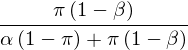

In [22]:
from sympy.abc import pi # get symbolic variable pi
post_prob = (1 - beta) * pi / ((1 - beta) * pi + alpha * (1 - pi))
post_prob

In [23]:
assoc = dict(t_s = pi * (1 - beta),
             t_ns = pi * beta,
             f_s = (1 - pi) * alpha,
             f_ns = (1 - pi) * (1 - alpha))
HTML(association_table(assoc, r'Considering prior $\pi := P(H_A)$'))

## From Button et al. : three messages

### message1 : studies of low power have low probability of detecting an effect

#### From the definition of power !

### message2 : studies of low power have low positive predictive value : PPV = P(H1 True | detection)

Same as Ioannidis - do the derivation starting with odd ratios 

From Button et al., we have the positive predictive value PPV defined as :

$$
PPV = \frac{(1-\beta)R}{(1-\beta)R + \alpha},\textrm{ with } R = P(H_1)/P(H_0) = P_1/P_0 = \pi / (1-\pi)
$$

Hence, 

$$
PPV = \frac{(1-\beta)P_1}{P_0}\frac{P_0}{(1-\beta)P_1 + \alpha P_0} 
$$

$$
= \frac{(1-\beta)P_1}{(1-\beta)P_1 + \alpha P_0} 
$$

$$
= P(H_1, T_S) / P(T_S) = P(H_1 | T_S) 
$$

If we have 4 chances over 5 that $H_0$ is true, and one over five that $H_1$ true, then R = 1/5 / 4/5 = .25. If there's 30% power we have PPV = 50%. So, 50% chance that our result is indeed true. 80% power leads to 80% chance of $H_1$ to be true knowing that we have detected an effect at the $\alpha$ risk of error. 

In [21]:
def PPV(R, Pw, alpha, verbose=True):
    ppv = (Pw * R)/(Pw*R + alph)
    if verbose:
        print("with odd ratio=%3.2f, "
               "power=%3.2f, alpha=%3.2f, "
               "we have PPV=%3.2f" %(R,Pw,alph,ppv))
    return ppv
    

In [22]:
# example from Button et al: P1 = 1/5, P0 = 4/5. R = 1/4
R = 1./4.
Pw = .8
alph = .05
ppv = PPV(R, Pw, alph)

with odd ratio=0.25, power=0.80, alpha=0.05, we have PPV=0.80


In [23]:
# if power is small :
R = 1./4.
Pw = np.arange(.1,1,.2)
alph = .05
for pw in Pw:
    PPV(R, pw, alph)


with odd ratio=0.25, power=0.10, alpha=0.05, we have PPV=0.33
with odd ratio=0.25, power=0.30, alpha=0.05, we have PPV=0.60
with odd ratio=0.25, power=0.50, alpha=0.05, we have PPV=0.71
with odd ratio=0.25, power=0.70, alpha=0.05, we have PPV=0.78
with odd ratio=0.25, power=0.90, alpha=0.05, we have PPV=0.82


### message3 : studies of low power exagerate the effect size of claimed effects

If the power is small, the studies that will find an effect significant will be estimating a stronger effect than the true one. Let's simulate the phenomenon.

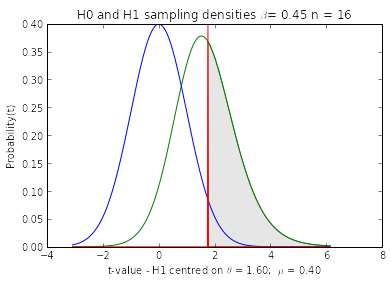

0.453264099362


In [24]:
n = 16 # number of subjects
sigma = 1.0
mu = .4
alpha = .05
pw = stat_power(n, mu, sigma, alpha=alpha, plot=True)
print pw

In [25]:
Nexp = 100

norv = sst.norm(0., sigma)
strv = sst.t(n-1)
t_05 = strv.isf(alpha)
sample = norv.rvs(size=(n,1)) + mu
#print np.std(sample)

tval = np.zeros((Nexp,))
effects = np.zeros((Nexp,))
effectsize = np
nb_detection = 0
for e in range(Nexp):
    sample = norv.rvs(size=(n,1)) + mu
    tval[e] = sample.mean()*sqrt(n)/np.std(sample, ddof=1)
    effects[e] = sample.mean()/np.std(sample, ddof=1)

relbias = 100*(effects[tval > t_05].mean() - mu)/mu
print "true mean effect", effects.mean()
print "mean effect estimated when test is significant", effects[tval > t_05].mean()

print "relative bias: %3.2f " % relbias

estimated_effect = effects[tval > t_05].mean()

true mean effect 0.449748450794
mean effect estimated when test is significant 0.668974816597
relative bias: 67.24 


Text(0,0.5,' t-value ')

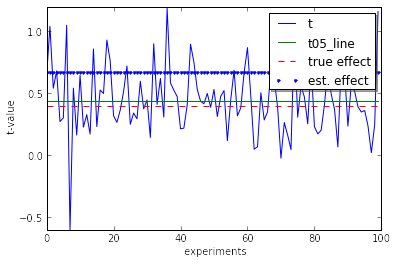

In [26]:
x = range(Nexp)
t05_line = np.ones_like(x)*t_05
true_effect = np.ones_like(x)*mu
est_effect = np.ones_like(x)*estimated_effect

lines = plot(x, effects, 'b-', x, t05_line/sqrt(n), 'g-', 
             x, true_effect, 'r--', 
             x, est_effect, 'b.') 
plt.legend( lines, ('t','t05_line', 'true effect', 'est. effect'), 'upper right', shadow=True)
plt.xlabel(" experiments ")
plt.ylabel(" t-value ")

In [27]:
from IPython.display import Image as Image

### Another way of seeing the same thing in Button et al, 2013:

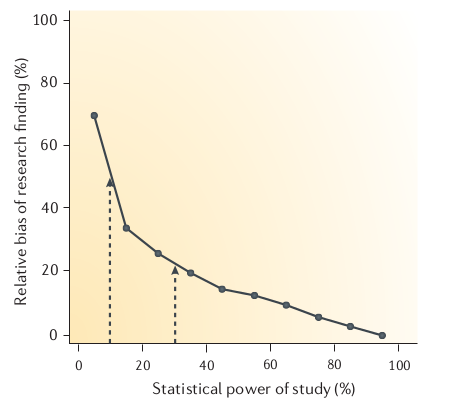

In [28]:
Image('./figures/button_fig5.png')

### Replication should be done with more subjects, not the same amount. 

A graph which I found hard to understand, because in c under the null the variance of the estimated mean should be reduced as well.

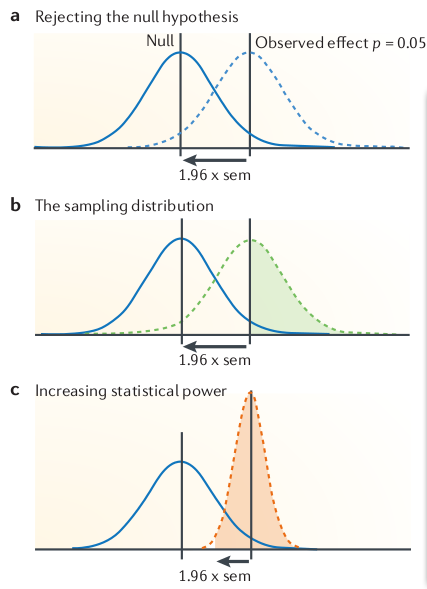

In [29]:
Image('./figures/button_fig1.png')

### Looking at the median power study of 49 Meta analysis : median power of studies in those

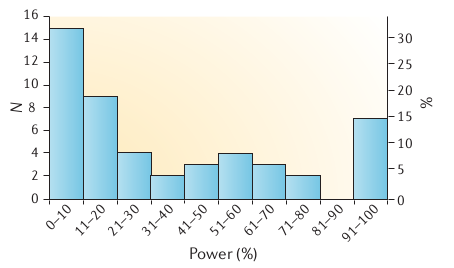

In [30]:
Image('./figures/button_fig2.png')

## Karl Friston 16 subjects magic number - cf Tal Yarkoni's answer

* Rule number four: the under-sampled study
* Rule number five: the over-sampled study
* Rule number eight: exploit superstitious thinking about voodoo correlations

### KF arguments can be summarized by:

1.  The null is always false: no effects are ever truly zero. Collect enough data and you will always end up rejecting the null.

2.  Large effects are more important than small ones. Very small effects are ‘trivial’.

3.  Very large samples will invariably end up identifying many small uninteresting effects. We should sample few subjects to detect only the big effects.


In [31]:
# power of KF analysis : d=1, 
n = 16; mu = .5; sigma = 1.; alpha = 0.05
stat_power(n, mu, sigma, alpha=alpha, plot=False)

### 1. A less favorable case

#### We are doing many test and have to decrease $\alpha$ - 

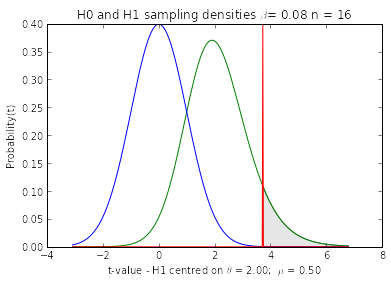

In [32]:
# analysis in a slightly less favorable case 
n = 16; mu = .5; sigma = 1.; alpha = 0.001
stat_power(n, mu, sigma, plot=True, alpha = alpha)

### In neuroimaging non corrected p-value are small, let's plot n as a function of alpha :

In [33]:
def n_power(pw=.8, mu=1., sigma=1., alpha=0.05):
    """
    compute the number of subjects needed to get pw given 
    mu, sigma and alpha
    """
    norv = sst.norm(0,1.)
    ta = norv.ppf(1 - alpha)
    tb = norv.ppf(1 - pw)
    n = (sigma*(ta - tb)/mu)**2
    return n


Text(0,0.5,' number of subject required for power = 0.80 ')

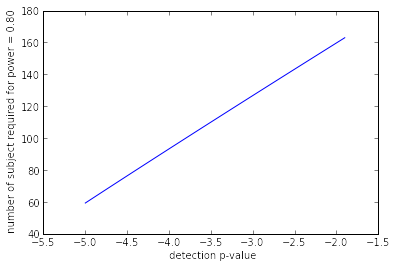

In [34]:
mu = .4; sigma = 1.; pw = .8

lnalph = np.arange(1.9,5.1,.1)
nsub = [n_power(pw, mu, sigma, alpha=10**(-a)) for a in lnalph]
x = 10**(-lnalph)
#print x
plot(np.log10(x)[::-1], nsub)
plt.xlabel(' detection p-value ')
plt.ylabel(' number of subject required for power = %3.2f ' % pw)
#xscale('log')

### 2. The uncertainty of small n results is very high. Confidence interval are just above zero.

In [35]:
def confidence_intervals(Nexp, **prmtrs):
    """
    Nexp: the number of experiments done
    prmtrs: a dictionary with our parameters, 
        example: prmtrs = {'n':16, 'mu':.3, 'sigma': 1., 'alpha': 0.05}
        
    returns arrays of size Nexp with:
    effect: the estimated effect
    detect: an array of 0 or 1, 1 when the effect is detected at alpha
    lCI: lower bound of confidence interval
    uCI: upper bound of confidence interval
    """
    # unpack parameters:
    mu = prmtrs['mu']; n = prmtrs['n']
    alpha = prmtrs['alpha']; sigma = prmtrs['sigma']
    df = n-1
    theta = mu*sqrt(n)/sigma

    norv = sst.norm(0., sigma)
    strv = sst.t(df)
    t_alph = strv.isf(alpha/2)
    
    t = np.zeros((Nexp,))
    effect = np.zeros((Nexp,))
    lCI = np.zeros((Nexp,))
    uCI = np.zeros((Nexp,))

    for e in range(Nexp):
        sample = norv.rvs(size=(n,)) + mu
        # effect and normalized effect size
        effect[e] = sample.mean()
        sigma_n = np.std(sample, ddof=1)/sqrt(n)  # np.std takes ddof as the df of freedom lost! here: 1.
        t[e] = effect[e]/sigma_n
        # confidence interval :
        CI = sst.t.ppf(1.-alpha/2., df)*sigma_n
        lCI[e] = effect[e] - CI # t_alph # 
        uCI[e] = effect[e] + CI # t_alph # 

    # number of detection:
    detect = t>t_alph
#    print 'number of detections:', xd.shape

    return (effect, detect, lCI, uCI)

In [36]:
#---------------------- parameters ------------------#
prmtrs = {'n':16, 'mu':.3, 'sigma': 1., 'alpha': 0.05}
theta = prmtrs['mu']*sqrt(prmtrs['n'])/prmtrs['sigma']

print 'power = ', stat_power(prmtrs['n'], prmtrs['mu'])
print 'mean t value should be around %3.2f \n' %theta

#--------------  simulate Nexp experiments ---------#
Nexp = 500
effect, detect, lCI, uCI = confidence_intervals(Nexp, **prmtrs)

power =  0.308927368051
mean t value should be around 1.20 



(lCI > mu  0.008


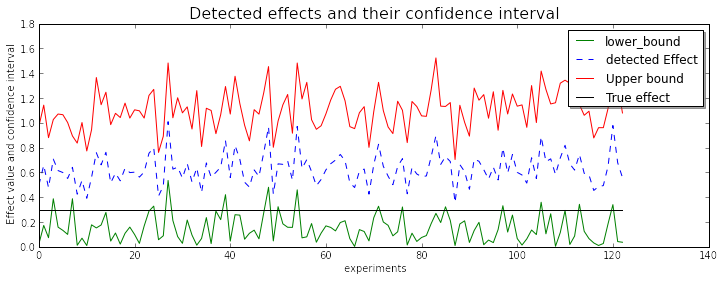

In [37]:
#--------------  plot ------------------------------#
x = np.arange(Nexp)
xd = np.arange(detect.sum())
mu_line = np.ones((Nexp,))*prmtrs['mu']

# print the number of lower confidence interval values that are above the true mean:
# this should be about the risk of error/2
print "(lCI > mu ", (lCI > mu).sum() / (1.*Nexp)
# there should be none of these:
# print "(lCI < 0 ", (lCI[detect] < 0).sum() / detect.sum()

f = plt.figure(1).set_size_inches(12,4)
lines = plt.plot(xd, lCI[detect], 'g-', 
                 xd, effect[detect], 'b--',
                 xd, uCI[detect], 'r-',
                 xd, mu_line[detect], 'k');
plt.legend( lines, ('lower_bound','detected Effect', 'Upper bound', 'True effect'), 'upper right', shadow=True)
plt.xlabel(" experiments ")
plt.ylabel(" Effect value and confidence interval ")
plt.title("Detected effects and their confidence interval", fontdict={'size':16});

### 3. Our prior is that effect sizes are small

* big effects have been found  : see Meyer et al (2001)
* big effect sizes are less likely than small ones :  the prior of big effects is low
* large sample studies report lower effects - as well as intra subjects

Example of Desmond and Glover 2002: using a threshold of 0.01, working memory task, 12 subject:


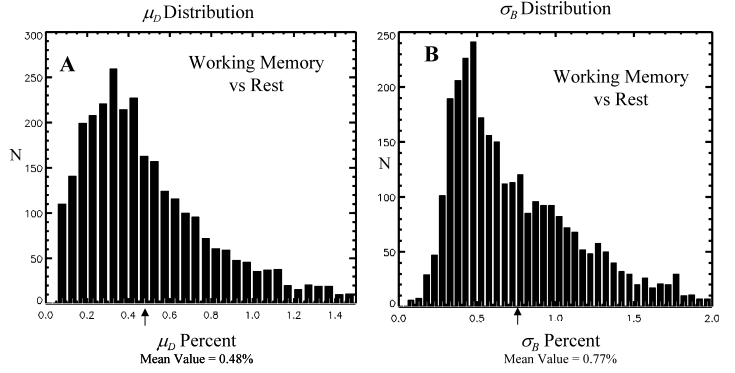

In [38]:
Image('./figures/Desmond_Glover_effectsize.png')

## "Protected inference" : 

### Protect against small effect if you want to by redefining the null (i.e., effect is within [-.1 .1])

## References

Katherine S. Button, John P. A. Ioannidis, Claire Mokrysz1, Brian A. Nosek4,
Jonathan Flint5, Emma S. J. Robinson6 and Marcus R. Munafò. Power failure: why small sample
size undermines the reliability of neuroscience.

T. Yarkoni, 2012 [citation needed]» Blog Archive » Sixteen is not magic: Comment on Friston (2012)

Desmond and Glover, Estimating sample size in functional MRI (fMRI) neuroimaging
studies: Statistical power analyses, Journal of Neuroscience Methods 118 (2002) 115/128.

K. Friston, 2012, Neuroimage. Ten ironic rules for non-statistical reviewers

Joseph P. Simmons, Leif D. Nelson and Uri Simonsohn. False-Positive Psychology: Undisclosed Flexibility in Data Collection and Analysis Allows Presenting Anything as Significant. Psychological Science. 2011.

C. Glenn Begley	 & Lee M. Ellis. Drug development: Raise standards for preclinical cancer research. Nature, 2012.

M Brandon Westover, Kenneth D Westover, Matt T Bianchi, 2011, BMC Medecine, Significance testing as perverse probabilistic reasoning.

Johnson, V.E. (2013). Revised standards for statistical evidence. Proceedings of the National Academy of Sciences 110, 19313–19317.

Halsey, L.G., Curran-Everett, D., Vowler, S.L., and Drummond, G.B. (2015). The fickle P value generates irreproducible results. Nature Methods 12, 179–185.

Eklund, A., Andersson, M., Josephson, C., Johannesson, M., and Knutsson, H. (2012). Does parametric fMRI analysis with SPM yield valid results?—An empirical study of 1484 rest datasets. NeuroImage 61, 565–578.


Carp, J. The secret lives of experiments: methods reporting in the fMRI literature. Neuroimage 63,
289–300 (2012).

    This article reviews methods reporting and methodological choices across 241 recent fMRI    studies and shows that there were nearly as many unique analytical pipelines as there were studies. In addition, many studies were underpowered to detect plausible effects.

Sander Heinsalu:

    "Publication bias is a problem in all fields of research. The results of a paper should actually receive zero weight in the evaluation of its quality, otherwise there is the motivation to cherry-pick the data that give the most impressive result. The measure of quality should be the way the results were obtained – size of sample, experimental procedure, endpoints used. Ideally the reviewers of a paper should not see its results at all, only the description of the experiment."


### Related blog posts:

http://daniellakens.blogspot.ca/2015/11/the-relation-between-p-values-and.html

